##NLP Homework 09
####Submitted By: Srashti Soni
####Exercise 1: Cosine Similarity with CBOW and Skip-Gram

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
from gensim.models import Word2Vec
import re

import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')

import gensim
from gensim.models import Word2Vec
from keras.preprocessing.sequence import skipgrams
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import re

from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
from textblob import TextBlob

from wordcloud import WordCloud

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from gensim.summarization import mz_keywords
from gensim.summarization import keywords

from gensim.summarization.summarizer import summarize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
txt = open('/content/sample_data/Europe_Covid.txt').read()
txt

'European countries are reporting record numbers of Covid-19 cases as the continent prepares for the pandemic to intensify through winter.Those affected include Europe\'s political class. Polish President Andrzej Duda tested positive for Covid-19 on Friday, according to a tweet from Presidential Minister Blazej Spychalski Saturday. Duda said that he was feeling well, was asymptomatic and would continue working in isolation. "As you can see, I am full of strength. I hope it will stay this way. However, the fact is that I must isolate. Together with my wife, we abide by the rules of isolation in an iron manner," he said in a video posted on Twitter on Saturday. "I would like to apologize to all of those, who have to go through quarantine procedures in connection to meeting with me in recent days ... I hope none of you get sick." The Polish President used the video to appeal to people to be especially careful of senior citizens, as they were particularly at risk from Covid-19. Duda\'s dia

In [ ]:
# Clean the text
clean_txt = re.sub(r'[^\w\s]', ' ', txt)
clean_txt
clean_txt=clean_txt.lower()
clean_txt

'european countries are reporting record numbers of covid 19 cases as the continent prepares for the pandemic to intensify through winter those affected include europe s political class  polish president andrzej duda tested positive for covid 19 on friday  according to a tweet from presidential minister blazej spychalski saturday  duda said that he was feeling well  was asymptomatic and would continue working in isolation   as you can see  i am full of strength  i hope it will stay this way  however  the fact is that i must isolate  together with my wife  we abide by the rules of isolation in an iron manner   he said in a video posted on twitter on saturday   i would like to apologize to all of those  who have to go through quarantine procedures in connection to meeting with me in recent days     i hope none of you get sick   the polish president used the video to appeal to people to be especially careful of senior citizens  as they were particularly at risk from covid 19  duda s diagn

In [ ]:
words = []
for i in sent_tokenize(clean_txt):
    temp = []
    for j in word_tokenize(i):
        temp.append(j.lower())
    words.append(temp)

words

[['european',
  'countries',
  'are',
  'reporting',
  'record',
  'numbers',
  'of',
  'covid',
  '19',
  'cases',
  'as',
  'the',
  'continent',
  'prepares',
  'for',
  'the',
  'pandemic',
  'to',
  'intensify',
  'through',
  'winter',
  'those',
  'affected',
  'include',
  'europe',
  's',
  'political',
  'class',
  'polish',
  'president',
  'andrzej',
  'duda',
  'tested',
  'positive',
  'for',
  'covid',
  '19',
  'on',
  'friday',
  'according',
  'to',
  'a',
  'tweet',
  'from',
  'presidential',
  'minister',
  'blazej',
  'spychalski',
  'saturday',
  'duda',
  'said',
  'that',
  'he',
  'was',
  'feeling',
  'well',
  'was',
  'asymptomatic',
  'and',
  'would',
  'continue',
  'working',
  'in',
  'isolation',
  'as',
  'you',
  'can',
  'see',
  'i',
  'am',
  'full',
  'of',
  'strength',
  'i',
  'hope',
  'it',
  'will',
  'stay',
  'this',
  'way',
  'however',
  'the',
  'fact',
  'is',
  'that',
  'i',
  'must',
  'isolate',
  'together',
  'with',
  'my',
 

In [ ]:
# Create one model for CBOW and one for Skip-Gram
cbow = gensim.models.Word2Vec(words, min_count = 1,  size = 100, window = 5)
skip_gram = gensim.models.Word2Vec(words, min_count = 1, size = 100, window = 5, sg = 1)


In [ ]:
# Determine the cosine similarity between ‘curfew’ and ‘government’
print("CBOW - Cosine similarity between curfew and governent:",
      cbow.wv.similarity('curfew', 'government'))

print("Skip gram - Cosine similarity between curfew and governent: ", 
      skip_gram.wv.similarity('curfew', 'government'))

CBOW - Cosine similarity between curfew and governent: -0.0050078514
Skip gram - Cosine similarity between curfew and governent:  0.021686591


Is there any difference in the similarity between ‘curfew’ and
‘government’ when you use CBOW and Skip-Gram?



CBOW : -0.0050078514

Skipgram: 0.021686591

###Exercise 2: Compute the Jaccard similarity index

In [ ]:
pair1 = ["What you do defines you","Your deeds define you"]
pair2 = ["Once upon a time there lived a king.", "Who is your queen?"]
pair3 = ["He is desperate", "Is he not desperate?"]

In [ ]:
# What is the Jaccard similarity index between pair1[0] and pair1[1]?

def jaccard_sim(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    print('Jaccard similarity:',float(intersection) / union )

jaccard_sim(pair1[0],pair1[1])

Jaccard similarity: 0.29411764705882354


### Exercise 3: What is the sentiment and subjectivity of the Europe_Covid text?

In [ ]:
sentiment = SentimentIntensityAnalyzer()

In [ ]:
# Use ‘SentimentIntensityAnalyser’ from nltk.sentiment.vader to provide the positive, neutral, negative, and compound sentiment.
print("Polarity Scores:",sentiment.polarity_scores(clean_txt))

Polarity Scores: {'neg': 0.051, 'neu': 0.9, 'pos': 0.049, 'compound': -0.3384}


In [ ]:
# What is the subjectivity?
subject = TextBlob(clean_txt)
print("Subjectivty of the text:",subject.subjectivity)

Subjectivty of the text: 0.362469500196773


### Exercise 4: WordCloud

In [34]:
# Removing stopwords
from spacy.lang.en import English
nlp = English()
my_doc = nlp(txt)
token_list = []
for token in my_doc:
    token_list.append(token.text)
from spacy.lang.en.stop_words import STOP_WORDS
result =[] 

for word in token_list:
    lexeme = nlp.vocab[word]
    if lexeme.is_stop == False:
        result.append(word) 
result = (" ").join(result)
print(result)

European countries reporting record numbers Covid-19 cases continent prepares pandemic intensify winter . affected include Europe political class . Polish President Andrzej Duda tested positive Covid-19 Friday , according tweet Presidential Minister Blazej Spychalski Saturday . Duda said feeling , asymptomatic continue working isolation . " , strength . hope stay way . , fact isolate . wife , abide rules isolation iron manner , " said video posted Twitter Saturday . " like apologize , quarantine procedures connection meeting recent days ... hope sick . " Polish President video appeal people especially careful senior citizens , particularly risk Covid-19 . Duda diagnosis comes country reported 13,632 new cases Friday , highest daily tally pandemic began . case tally 50 % higher Monday 7,482 cases . " second wave hit entire Europe equally , " Prime Minister Mateusz Morawiecki said Friday . countries highest rate infection worldwide Europe , according Johns Hopkins University latest movin

In [35]:
# What are the most frequently used words in the Europe_Covid text?

wordCloud = WordCloud(collocations = False, background_color = 'black').generate(result)

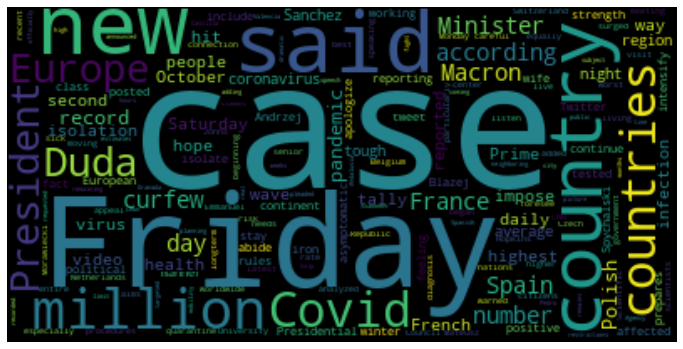

In [36]:
plt.figure(figsize=(12, 8))
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

###Exercise 5: Summarize the text in 250 words using extractive summarization (‘from genism.summarization import summarize’)

In [ ]:
keywords(clean_txt).split('\n')

['said',
 'new',
 'macron',
 'minister',
 'recorded',
 'duda',
 'cases',
 'case',
 'reporting record',
 'europe',
 'sanchez',
 'coronavirus',
 'president',
 'country reported',
 'days',
 'day',
 'hit',
 'republic',
 'hopkins',
 'averages',
 'average',
 'countries',
 'daily',
 'health',
 'friday according',
 'french']

In [ ]:
print ('Extractive Summary of the text:')
print (summarize(txt, word_count=250))

Extractive Summary of the text:
European countries are reporting record numbers of Covid-19 cases as the continent prepares for the pandemic to intensify through winter.Those affected include Europe's political class.
Polish President Andrzej Duda tested positive for Covid-19 on Friday, according to a tweet from Presidential Minister Blazej Spychalski Saturday.
Duda's diagnosis comes as the country reported 13,632 new cases Friday, the highest daily tally since the pandemic began.
"The second wave has hit the entire Europe equally," Prime Minister Mateusz Morawiecki said Friday.
The five countries with the highest rate of infection worldwide are all in Europe, according to Johns Hopkins University's latest moving averages, as analyzed by CNN.The worst-hit nations are the Czech Republic, Belgium, the Netherlands, Switzerland and France.In all five countries, the number of new infections has surged since the beginning of October.
French President Emmanuel Macron warned Friday that his co